<a href="https://colab.research.google.com/github/Alenushka2013/Practice_stepic/blob/main/213585_5_1_Histplots_and_pieplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Гистограммы и круговые диаграммы** являются одними из самых популярных (если не самыми популярными) способов визуализации данных, поэтому стоит разобраться в их сути:

* **Гистограммы (hist plots)** визуализируют распределения данных. С помощью них можно легко понять как значения распределяются по интервалам.
* **Круговые диаграммы (pie plots)** показывают процентное соотношение (пропорции) категориальных данных. Это буквально куски пирога!


____________



*Предисловие: я не буду объяснять абсолютно все-все параметры графиков, а только базовые, чтобы у вас появилось общее понимание этой библиотеки и того, как работать с графиками. Знайте, что эта библиотека ОЧЕНЬ мощная и с помощью нее можно делать очень сложные, но при этом красивые и информативные графики.*

## Гистограммы

### Гистограмма длины клювов

**Гистограмма (hist plot)** позволяет визуализировать частотное распределение числовых данных. Это полезно, когда нужно понять, какие значения встречаются чаще, а какие реже.

Помните, я говорил вам про встроенные датасеты библиотеки Seaborn? Настало время ими попользоваться! Для сегодняшнего урока возьмем датасет с пингвинчиками. Напоминаю, что встроенные в seaborn датасеты подключаются так:

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Построим же гистограмму с помощью **sns.histplot()**, чтобы посмотреть на распределение длины клювов пингвинов!

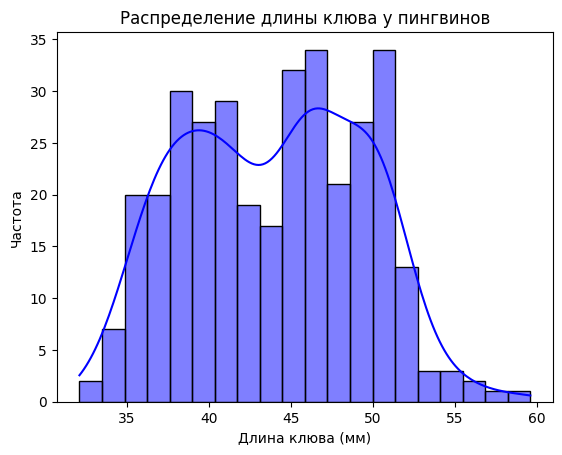

In [ ]:
sns.histplot(data=penguins, x='bill_length_mm', bins=20, kde=True, color='blue')

plt.title('Распределение длины клюва у пингвинов')
plt.xlabel('Длина клюва (мм)')
plt.ylabel('Частота')

plt.show()

**Что же здесь вообще произошло?**

* Для начала мы использовали функцию **sns.histplot()** для построения гистограммы. В аргументе *bins=20* мы указали количество интервалов (корзин, бинов, "вот этих вот столбиков короче"), а с помощью *kde=true* добавили кривую плотности для более наглядного отображения нашего распределения.

* Далее с помощью *plt.title(), plt.xlabel() и plt.ylabel()* мы поставили название графика, оси X и оси Y.

* С помощью *plt.show()* мы вывели нашу гистограмму.

### Настройка гистограммы и hue

Основные [аргументы](https://seaborn.pydata.org/generated/seaborn.histplot.html) **sns.histplot()**:
* *data=* – ваш датасет / исследуемый столбец
* *x=* – отвечает за то, что будет на оси X. В случае, если вы передали в data датасет, здесь можно указать исследуемый столбец.
* *y=* – отвечает за то, что будет на оси Y.
* *hue=* – добавляет дополнительную переменную для отображения с помощью цветовой кодировки.
* *bins=* – отвечает за количество корзин.
* *binwidth=* – отвечает за ширину корзин.

Аргумент hue очень важен для понимания, разберем его поподробнее. Грубо говоря, в hue мы передаем какую-то категориальную переменную (или их список), по которой строятся отдельные гистограммы. На построенном графике можно будет посмотреть распределение какого-то числового признака в зависимости от значения какого-то категориального признака.

Посмотрим, какое распределение длины клюва у разных видов пингвинов.

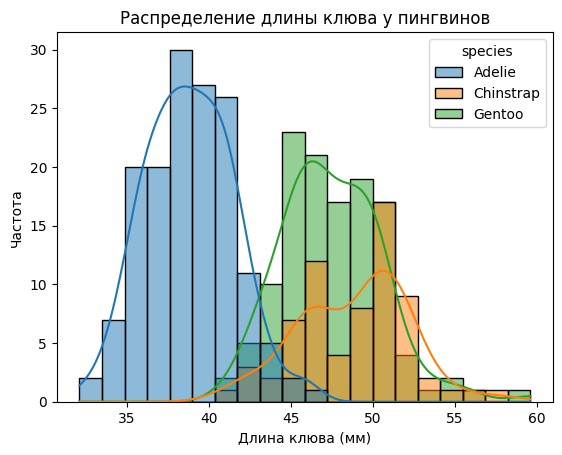

In [ ]:
sns.histplot(data=penguins, x='bill_length_mm', bins=20, kde=True, hue='species')

plt.title('Распределение длины клюва у пингвинов')
plt.xlabel('Длина клюва (мм)')
plt.ylabel('Частота')

plt.show()

## Круговые диаграммы

**Круговая диаграмма (pie plot)** позволяет визуализировать пропорции различных категорий данных. Это полезно, когда нужно показать, как части относятся к целому.

В нашем датасете есть колонка (которую мы уже использовали в hue в гистограммах), в которой содержится информация о виде пингвина. Давайте используем ее для построения круговой диаграммы.

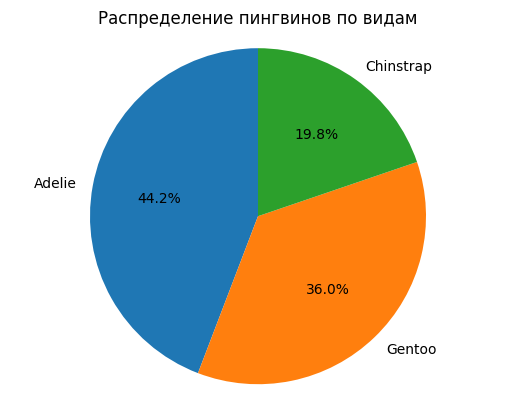

In [ ]:
species_counts = penguins['species'].value_counts()

plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Распределение пингвинов по видам')

# Убедимся, что круг круглый
plt.axis('equal')

plt.show()

**Примерно начал понимать суть, но что все-таки происходит-то?**
И так, по порядку:
* Сначала мы создали Series с названием species_counts с помощью *value_counts()*, в котором записано количество пингвинов по видам. Это было делать совсем необязательно, в pie-plot можно сразу передавать value_counts().
* Далее мы вызываем функцию **plt.pie()** (да, в сиборне нет круговой диаграммы, поэтому используем matplotplib), в которую помимо нашего Series передаем его индексы (в параметр *labels=*). Туда же мы передаем аргументы *autopct=*, который отвечает за то, как будут обозначаться проценты внутри нашего "пирога" и *startangle=*, который задает угол нашего графика.
* После этого мы убеждаемся, что «круг круглый» с помощтю **plt.axis('equal')** и выводим наш график

